In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loaidng the dataset to the console
df = pd.read_csv('KOPA.csv')

df.head()

,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,TotalDays,AmountPaid30,AmountPaid60,AmountPaid360,LoanStatus360
0,Product B,Male,Location 2,Region 2,16600,7/4/2014,2000,40,365,3121,4241,13621,Active
1,Product B,Male,Location 3,Region 3,16600,1/2/2015,2000,40,365,3061,4171,15041,Active
2,Product C,Female,Location 5,Region 5,15600,12/8/2012,1000,40,365,2160,3280,15340,Active
3,Product B,Male,Location 6,Region 1,16600,2/20/2015,2000,40,365,3041,4241,15321,Active
4,Product D,Female,Location 7,Region 2,20250,10/28/2013,2000,50,365,3470,4820,13720,Active


In [3]:
# knowing the number of rows and columns in the dataset
df.shape

(9195, 13)

In [55]:
# determining the number of unique values in the loanstatus360 column
df['LoanStatus360'].unique()

array(['Active', 'Blocked', 'Finished Payment'], dtype=object)

In [4]:
# confirming that the dataset has no null value if there is, remove it
df.isnull().sum()

Product           0
CustomerGender    0
Location          0
Region            0
TotalPrice        0
StartDate         0
Deposit           0
DailyRate         0
TotalDays         0
AmountPaid30      0
AmountPaid60      0
AmountPaid360     0
LoanStatus360     0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,TotalPrice,Deposit,DailyRate,TotalDays,AmountPaid30,AmountPaid60,AmountPaid360
count,9195.000000,9195.000000,9195.000000,9195.0,9195.000000,9195.000000,9195.000000
mean,19266.264274,2311.528004,46.451332,365.0,3580.482762,4735.672974,14673.833061
std,6053.291677,1412.612091,13.375759,0.0,2487.320211,2756.332798,6676.242654
min,13775.000000,1000.000000,35.000000,365.0,-3200.000000,-3200.000000,-3200.000000
25%,16600.000000,2000.000000,40.000000,365.0,2500.000000,3437.500000,11351.000000
50%,16600.000000,2000.000000,40.000000,365.0,3351.000000,4400.000000,15140.000000
75%,20250.000000,2000.000000,50.000000,365.0,4601.000000,5668.000000,16600.000000
max,69225.000000,9000.000000,165.000000,365.0,26001.000000,33501.000000,69225.000000


# Feature Extraction

In [33]:
df.dtypes

Product           object
CustomerGender    object
Location          object
Region            object
TotalPrice         int64
StartDate         object
Deposit            int64
DailyRate          int64
TotalDays          int64
AmountPaid30       int64
AmountPaid60       int64
AmountPaid360      int64
LoanStatus360     object
dtype: object

In [40]:
# kopa_regression = df.copy()

kopa_classification = df.copy()

In [34]:
cat_columns =['Product','CustomerGender', 'Location', 'Region', 'StartDate', 'LoanStatus360']

cat_columns

['Product',
 'CustomerGender',
 'Location',
 'Region',
 'StartDate',
 'LoanStatus360']

In [37]:
# label encode our data

#instantiate the encoder
encoder = LabelEncoder()

# fit and transform the data
for column in cat_columns:
    kopa_regression[column] = encoder.fit_transform(kopa_regression[column])


In [38]:
kopa_regression

,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,TotalDays,AmountPaid30,AmountPaid60,AmountPaid360,LoanStatus360
0,1,1,108,10,16600,1255,2000,40,365,3121,4241,13621,0
1,1,1,219,11,16600,44,2000,40,365,3061,4171,15041,0
2,2,0,441,13,15600,470,1000,40,365,2160,3280,15340,0
3,1,1,552,0,16600,532,2000,40,365,3041,4241,15321,0
4,3,0,659,10,20250,201,2000,50,365,3470,4820,13720,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9190,0,0,220,10,20250,1109,2000,50,365,3601,4301,20250,2
9191,3,0,519,14,20250,1380,2000,50,365,4001,5501,20250,2
9192,1,0,762,10,16600,1024,2000,40,365,3401,4601,16600,2
9193,1,1,330,12,16600,440,2000,40,365,3400,4600,16600,2


<AxesSubplot:>

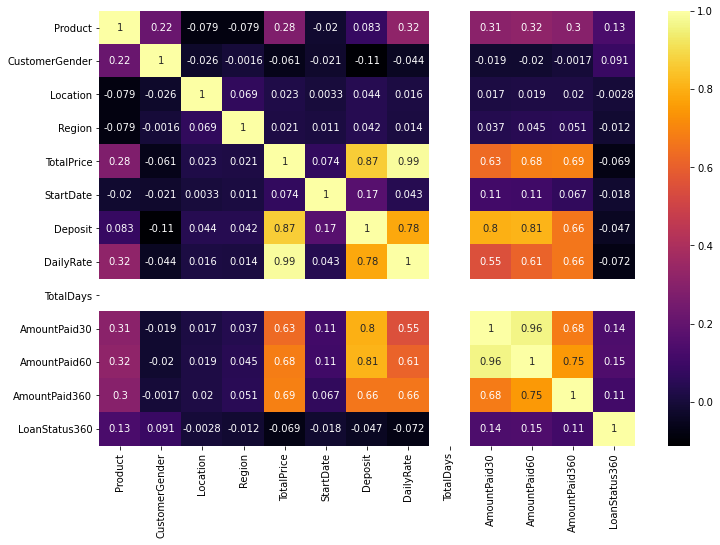

In [14]:
# check corrlation
corr_matrix = kopa_regression.corr()

# visiualize the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='inferno')

In [15]:
kopa_regression.drop(['Location','StartDate','TotalDays','AmountPaid30','DailyRate'], 
                     axis=1,
                     inplace=True)

In [16]:
kopa_regression.head()

,Product,CustomerGender,Region,TotalPrice,Deposit,AmountPaid60,AmountPaid360,LoanStatus360
0,1,1,10,16600,2000,4241,13621,0
1,1,1,11,16600,2000,4171,15041,0
2,2,0,13,15600,1000,3280,15340,0
3,1,1,0,16600,2000,4241,15321,0
4,3,0,10,20250,2000,4820,13720,0


# Regression Model

In [17]:
# Modelling
x = kopa_regression.drop('AmountPaid360', axis=1)

y= kopa_regression['AmountPaid360']

In [18]:
# split data

#import module
from sklearn.model_selection import train_test_split

# split data
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2 , random_state=42)

In [29]:
# Create first model
# import model and metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [20]:
# begin our model training
# start with DummyClassifier to establish the baseline
#instantiate
dummy = DummyRegressor()
#train
dummy.fit(x_train, y_train)
#test
dummy_pred = dummy.predict(x_test)

In [21]:
# evaluate
mean_squared_error(y_test, dummy_pred)

50405935.88366079

In [22]:
mean_absolute_error(y_test, dummy_pred)

4403.0242303117075

In [23]:
# Linear Regression Model
linr = LinearRegression()
linr.fit(x_train, y_train)
linr_pred = linr.predict(x_test)

In [24]:
mean_squared_error(y_test, linr_pred)

16705726.912812574

In [25]:
mean_absolute_error(y_test, linr_pred)

3245.852258706231

In [26]:
# Decision Tree Regressor Model
dect = DecisionTreeRegressor()
dect.fit(x_train, y_train)
dect_pred = dect.predict(x_test)

In [27]:
mean_squared_error(y_test, dect_pred)

11456749.321269087

In [28]:
mean_absolute_error(y_test, dect_pred)

2218.244961893122

In [ ]:
# Random Forest Regressor Model
ranf = RandomForestRegressor()
ranf.fit(x_train, y_train)
ranf_pred = ranf.predict(x_test)

In [31]:
mean_squared_error(y_test, ranf_pred)

8422298.620603396

In [32]:
mean_absolute_error(y_test, ranf_pred)

1946.8147813350904

# Classification Model

In [49]:
# classification aspect
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report

In [41]:
kopa_classification

,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,TotalDays,AmountPaid30,AmountPaid60,AmountPaid360,LoanStatus360
0,Product B,Male,Location 2,Region 2,16600,7/4/2014,2000,40,365,3121,4241,13621,Active
1,Product B,Male,Location 3,Region 3,16600,1/2/2015,2000,40,365,3061,4171,15041,Active
2,Product C,Female,Location 5,Region 5,15600,12/8/2012,1000,40,365,2160,3280,15340,Active
3,Product B,Male,Location 6,Region 1,16600,2/20/2015,2000,40,365,3041,4241,15321,Active
4,Product D,Female,Location 7,Region 2,20250,10/28/2013,2000,50,365,3470,4820,13720,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9190,Product A,Female,Location 30,Region 2,20250,6/30/2016,2000,50,365,3601,4301,20250,Finished Payment
9191,Product D,Female,Location 57,Region 6,20250,8/4/2013,2000,50,365,4001,5501,20250,Finished Payment
9192,Product B,Female,Location 8,Region 2,16600,6/14/2014,2000,40,365,3401,4601,16600,Finished Payment
9193,Product B,Male,Location 4,Region 4,16600,12/29/2014,2000,40,365,3400,4600,16600,Finished Payment


In [42]:
# label encode our data

#instantiate the encoder
encoder = LabelEncoder()

# fit and transform the data
for column in cat_columns:
    kopa_classification[column] = encoder.fit_transform(kopa_classification[column])


In [43]:
kopa_classification

,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,TotalDays,AmountPaid30,AmountPaid60,AmountPaid360,LoanStatus360
0,1,1,108,10,16600,1255,2000,40,365,3121,4241,13621,0
1,1,1,219,11,16600,44,2000,40,365,3061,4171,15041,0
2,2,0,441,13,15600,470,1000,40,365,2160,3280,15340,0
3,1,1,552,0,16600,532,2000,40,365,3041,4241,15321,0
4,3,0,659,10,20250,201,2000,50,365,3470,4820,13720,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9190,0,0,220,10,20250,1109,2000,50,365,3601,4301,20250,2
9191,3,0,519,14,20250,1380,2000,50,365,4001,5501,20250,2
9192,1,0,762,10,16600,1024,2000,40,365,3401,4601,16600,2
9193,1,1,330,12,16600,440,2000,40,365,3400,4600,16600,2


In [44]:
kopa_classification.drop(['Location','StartDate','TotalDays','AmountPaid30','DailyRate'], 
                     axis=1,
                     inplace=True)

In [45]:
kopa_classification.head()

,Product,CustomerGender,Region,TotalPrice,Deposit,AmountPaid60,AmountPaid360,LoanStatus360
0,1,1,10,16600,2000,4241,13621,0
1,1,1,11,16600,2000,4171,15041,0
2,2,0,13,15600,1000,3280,15340,0
3,1,1,0,16600,2000,4241,15321,0
4,3,0,10,20250,2000,4820,13720,0


In [52]:
x = kopa_classification.drop('LoanStatus360', axis=1)

y= kopa_classification['LoanStatus360']

In [48]:
# split the data into train and test
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.2, stratify = y)

In [53]:
# etablish the baseline through dummy classifier
dum_c = DummyClassifier()
dum_c.fit(x_train, y_train)
dumc_pred = dum_c.predict(x_test)

In [54]:
# confusion matrix of dummy classifier
confusion_matrix(y_test, dumc_pred)

array([[1348,    0,    0],
       [ 170,    0,    0],
       [ 321,    0,    0]], dtype=int64)

In [56]:
print(classification_report(y_test, dumc_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1348
           1       0.00      0.00      0.00       170
           2       0.00      0.00      0.00       321

    accuracy                           0.73      1839
   macro avg       0.24      0.33      0.28      1839
weighted avg       0.54      0.73      0.62      1839



C:\Users\owino\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\owino\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\owino\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
# Logistic Regression Model
logr_c = LogisticRegression(max_iter=10000)
logr_c.fit(x_train, y_train)
logr_pred = logr_c.predict(x_test)

In [59]:
# confusion matrix of Logistic Regression classifier
confusion_matrix(y_test, logr_pred)

array([[1320,   28,    0],
       [  61,  109,    0],
       [   0,    0,  321]], dtype=int64)

In [60]:
# Classification Report of the Logistic Regression Model Performance 
print(classification_report(y_test, logr_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1348
           1       0.80      0.64      0.71       170
           2       1.00      1.00      1.00       321

    accuracy                           0.95      1839
   macro avg       0.92      0.87      0.89      1839
weighted avg       0.95      0.95      0.95      1839



In [61]:
# Decision Tree Classification Model
dect_c = DecisionTreeClassifier()
dect_c.fit(x_train, y_train)
dect_pred = dect_c.predict(x_test)

In [62]:
# confusion matrix of Decision Tree classifier
confusion_matrix(y_test, dect_pred)

array([[1266,   77,    5],
       [  59,  111,    0],
       [   0,    0,  321]], dtype=int64)

In [63]:
# Classification Report of the Decision Tree Model performance
print(classification_report(y_test, dect_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1348
           1       0.59      0.65      0.62       170
           2       0.98      1.00      0.99       321

    accuracy                           0.92      1839
   macro avg       0.84      0.86      0.85      1839
weighted avg       0.93      0.92      0.92      1839



In [64]:
# Random Forest Classification Model
ranf_c = RandomForestClassifier()
ranf_c.fit(x_train, y_train)
ranf_pred = ranf_c.predict(x_test)

In [65]:
# confusion matrix of Random Forest classifier
confusion_matrix(y_test, ranf_pred)

array([[1313,   31,    4],
       [  65,  105,    0],
       [   2,    0,  319]], dtype=int64)

In [66]:
# Classification report of the Random Forest Model perfomance
print(classification_report(y_test, ranf_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1348
           1       0.77      0.62      0.69       170
           2       0.99      0.99      0.99       321

    accuracy                           0.94      1839
   macro avg       0.90      0.86      0.88      1839
weighted avg       0.94      0.94      0.94      1839

